In [180]:
from matplotlib import pyplot as plt
%matplotlib inline

In [193]:
import openslide_generator
import importlib
importlib.reload(openslide_generator)

<module 'openslide_generator' from '/Users/quolc/pathology/chainerSVS/kerasrepo/openslide_generator.py'>

In [37]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256)

loaded 2 slide(s).
[0] desert1.tif
- 2 regions
- 22539142.5 px2
- patch scale: 300
- fetch probability (area mode): 0.8917184858626199
[1] desert2.tif
- 2 regions
- 7971891.0 px2
- patch scale: 512
- fetch probability (area mode): 0.10828151413738
there are total 4 regions.
patches per epoch is set to 280.



In [63]:
# gen_train.fetch_mode = 'area'
gen_train.fetch_mode = 'slide'
# gen_train.fetch_mode = 'label'
gen_train.reset_fetch_count()

In [64]:
positions = dict()
for i in range(2000):
    if i % 100 == 0:
        print(i)
    _, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    if not slide_id in positions:
        positions[slide_id] = []
    positions[slide_id].append((posx, posy, label))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


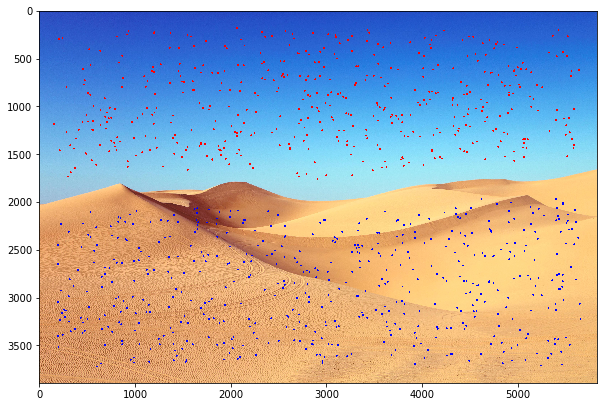

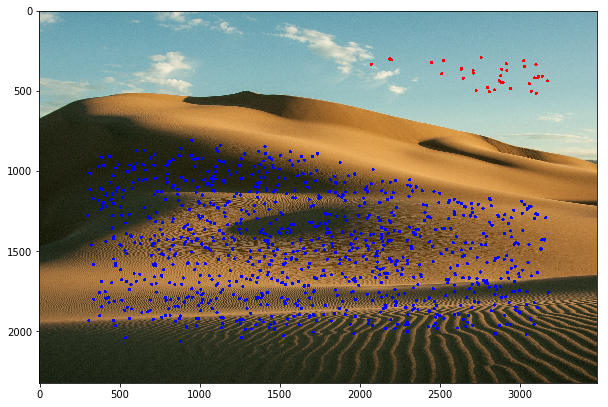

In [65]:
import cv2

images = ['./test_slides/desert1.jpg', './test_slides/desert2.jpg']

for i, filename in enumerate(images):
    image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    for posx, posy, label in positions[i]:
        if label == 0:
            cv2.circle(image, (int(posx), int(posy)), 10, (255,0,0), -1)
        else:
            cv2.circle(image, (int(posx), int(posy)), 10, (0,0,255), -1)

    plt.figure(figsize=(10,10))
    plt.imshow(image)

In [172]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256,
        blur=20)

loaded 2 slide(s).
[0] desert1.tif
- 2 regions
- 22539142.5 px2
- patch scale: 300
- fetch probability (area mode): 0.8917184858626199
[1] desert2.tif
- 2 regions
- 7971891.0 px2
- patch scale: 512
- fetch probability (area mode): 0.10828151413738
there are total 4 regions.
patches per epoch is set to 280.



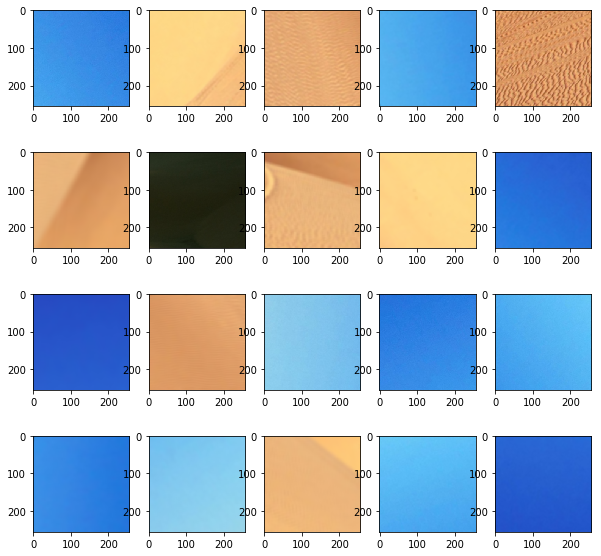

In [173]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))

In [196]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256,
        he_augmentation=True, verbose=0)

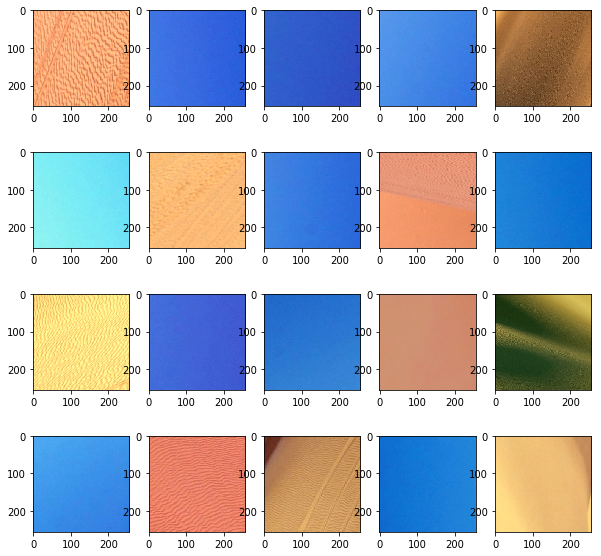

In [197]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))